# Revenue Management Basics


### Contents
1. [Price Elasticity of Demand](#peod)
2. [Maximizing Revenue with Single Rate](#mrwsr)
3. [Maximizing Revenue with Multiple Rates](#mrwmr)
    - [Maximizing Revenue with Two Rates](#mrwtr)
    - [Expected Marginal Seat Revenue (EMSR A)](#emsra)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import Bounds, minimize
from scipy.stats import norm

<a id='peod'></a>
# Price Elasticity of Demand

Notes from [online overview](http://www.economicsdiscussion.net/price-elasticity-of-demand/price-elasticity-of-demand-with-formula/25223):

Elasticity is the response of one variable, such as quantity demanded, to change in another variable, such as price.

The quantity demanded of a commodity is affected by a large number of variables. Elasticity of demand measures the degree of responsiveness of quantity demanded of a commodity to a change in one of the variables affecting demand (i.e., to a change in any one of the demand determinants). The response to change in each influencing variable is measured by a separate elasticity concept. We may start with the most commonly encountered of all elasticities, viz., and price elasticity of demand.

If a change in price leads to a large enough change in quantity demanded that lowering the price results in a higher revenue, then demand for the commodity is said to be elastic, if it results in equal revenue it is said to have unit elasticity, if lower revenue it is inelastic. If the change in quantity demanded is relatively small, demand is said to be inelastic.

- Coefficient of price elasticity of demand = $E_p$
- Qualtity demanded = $Q$
- Price = $P$

$$
E_p = \frac{\frac{\Delta Q}{Q}} {\frac{\Delta P}{P}}
$$

Description | Elasticity Coeff
---|---
Elastic | $E_p > 1$
Unit | $E_p = 1$
Inelastic | $E_p < 1$

Note: Demand change (v change in quantity demanded) is when the intercept of the demand curve shifts

Note: All demands are theoretically negative, but by convention negative sign is left off

In [2]:
def price_elasticity_of_demand(base_q, delta_q, base_p, delta_p):
    peod = (delta_q / base_q) / (delta_p / base_p)
    return peod

print('inelastic example')
print(price_elasticity_of_demand(100, 5, 100, -7))

print('\nelastic example')
print(price_elasticity_of_demand(100, 5, 100, -3))

inelastic example
-0.7142857142857143

elastic example
-1.6666666666666667


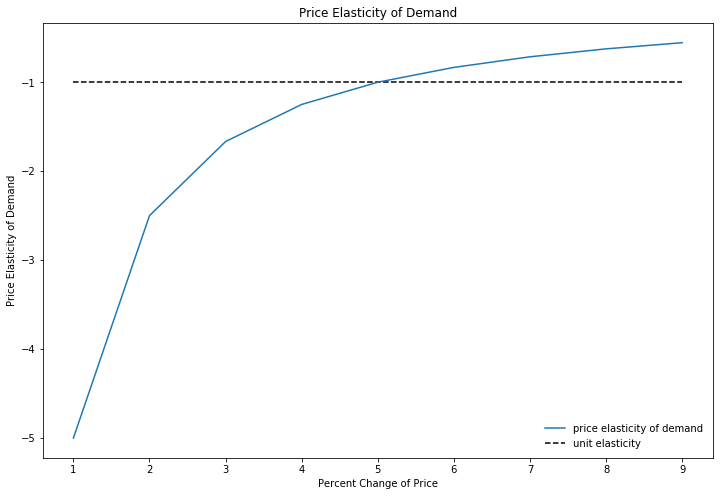

Constant demand of 100 and constant change of demand of 5


In [3]:
delta_p = np.arange(1, 10, 1)

peod = [price_elasticity_of_demand(100, -5, 100, dp) for dp in delta_p]

plt.figure(figsize=(12, 8))
plt.hlines(-1, min(delta_p), max(delta_p), linestyle='dashed', label = 'unit elasticity')
plt.plot(delta_p, peod, label='price elasticity of demand')
plt.legend(frameon=False, loc='lower right')
plt.xlabel('Percent Change of Price')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand')
plt.show()

print('Constant demand of 100 and constant change of demand of 5')

<a id='mrwsr'></a>
# Maximizing Revenue with Single Rate

Link to an excelent [youtube series](https://www.youtube.com/channel/UCdYU-RVSj2_b-GGA1EXWQzw) covering the concepts below. If anything is unclear, review the relevant video.

Optimal Price Point: 71.43


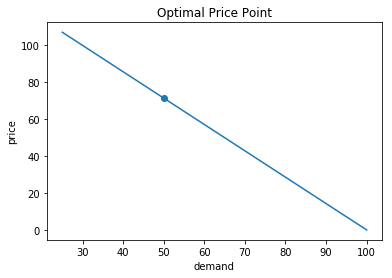

Note: In reality, we would expect the demand to be a curved line, 
with more elasticity at higher prices, less elasticity at lower prices.


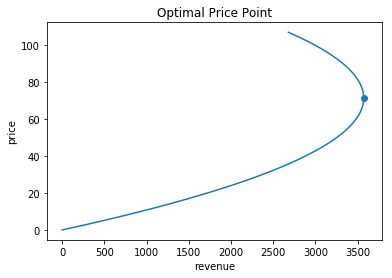

In [4]:
def linear_demand(rate, slope, intercept):
    return rate * slope + intercept

def revenue(rate, slope, intercept):
    return rate * linear_demand(rate, slope, intercept)

# defining these outside function so I can call them in plots
assumed_slope = -.7
assumed_intercept = 100

def neg_assumed_revenue(rate):
    return -1 * revenue(rate, assumed_slope, assumed_intercept)

minimization = minimize(neg_assumed_revenue, np.array([50]), 
                        method='L-BFGS-B', bounds=Bounds([0], [np.inf]))

print('Optimal Price Point: ' + str(round(minimization['x'][0], 2)))

prices = np.arange(0, minimization['x'] * 1.5, .001)
plt.title('Optimal Price Point')
plt.xlabel('demand')
plt.ylabel('price')
plt.plot([linear_demand(p, assumed_slope, assumed_intercept) for p in prices], prices)
plt.scatter(linear_demand(minimization['x'], assumed_slope, assumed_intercept), minimization['x'])
plt.show()

print('Note: In reality, we would expect the demand to be a curved line, \nwith more elasticity at higher prices, less elasticity at lower prices.')

plt.title('Optimal Price Point')
plt.xlabel('revenue')
plt.ylabel('price')
plt.plot([neg_assumed_revenue(p) * -1 for p in prices], prices)
plt.scatter(neg_assumed_revenue(minimization['x']) * -1, minimization['x'])
plt.show()



<a id='mrwmr'></a>
# Maximizing Revenue with Multiple Rates

## Market Segmentation

Since revenue is area under the curve (rectangle from origin to optimal price in price demand chart), 
and total demand is area of triangle between the origin, the x intercept and the y intercept. Using a single price misses demand at prices above optimal price point, and below optimal price point (top of triangle and left of triangle, respectively). So use segmentation to introduce higher and lower prices that prevent customers from moving between segments. In economics this is called price discrimination.

### Segmentation fencing examples:
- 21 day advanced purchase requirement
- saturday stay requirement
- business contract
- etc

### Elasticity Analysis
- At the optimal price, $P_e = 1$, which means the demand in the corresponding rectangle is said to have unit elasticity
  - Increasing or decreasing the rate will decrease revenue
- The demand above the rectangle has $P_e > 1$, and is said to be elastic
  - Increasing these rates will decrease revenue
  - Decreasing these rates will increase revenue
- The demand below the rectangle has $P_e < 1$, and is said to be inelastic
  - Increasing these rates will increase revenue
  - Decreasing these rates will decrease revenue
  
## Forecasting
Implementing market segmentation means that companies must allocate capacity to each market segment. Before they can optimize capacity allocation, they must forecast demand for each market segmentation. There are a bunch of ways to forecast demand, typically season, day of week, special events/promos, and other variables inform forecast. You can also use already materialized demand. For now let's just assume we have a forecast and move on to protection levels.

## Protection Levels
Using each segment's demand forecast, companies set protection levels and nested limits. The limits are the sum of higher revenue segments + the level's own protection level, since it is always good to allow a higher revenue segment to displace a lower level segment. The lowest segment has no protection level.

Segment Price | Protection Level | Limit
---|---|---
High| 10 | 60
Medium | 20 | 50
Low | 30 | 30
Lowest | 0


<a id='mrwtr'></a>
## Maximizing Revenue with Two Rates

### Littlewood's Rule
The basic problem of setting protection levels comes from the fact that it is usually more likely you will sell a lower priced unit of capacity than one that is higher priced. It is also usually the case that lower priced demand materializes before higher priced demand. Littlewood's rule helps decide what demand to accept at a lower price, and what capacity to save for potential buyers who are willing to pay more at a later date. But since we don't know the exact demand (number of customers willing to buy at each rate), we use the formula below to calculate expected demand, then balance the two rate classes by probability of selling and revenue. When the expected value of the high rate inventory $<$ vaule of the low rate inventory, we sell lower rate inventory. When they are equal, we sell what ever type someone tries to buy first.


- $r$ = rate
- $p(r)$ = probability of buyer materializing and inventory being sold at rate (derived from forecasted demand)
- $E[r]$ = expected value of the next unit sold at rate, also called Expected Marginal Revenue (EMR)
- $r_l$ = low rate
- $r_h$ = high rate

Expected revenue for any rate is:
$$E[r] = p(r)r$$

So, as long as 
$$r_l \geq E[r_h]$$ 
we should accept lower rate offers.

Below is an example of how to crank out the math. `p_sellout` is a function that returns the probability of a rate level's inventory selling out at least `room_count` number of rooms. In real life this would depend on the rate we chose for the room, but lets just use a static distribution for this demonstration.

In [5]:
def p_sellout(room_count, exponent):
    """
    p_sellout is a function that returns the probability of a rate level's inventory selling out at least room_count
    NOTE: This distribution is arbitraryly complicated, but a better distribution of avg sales would usually be
    the normal distribution, which I will use later on. 
    The point is, you can use a different distribuition if you have reason to believe it's more appropriate.
    """
    if room_count == 0:
        return 1
    else:
        return room_count**exponent

# exponetial demand decay term
e = -.1
# low and high rates
r_l = 25
r_h = 30

protection_analysis = {}
for i in range(0, 10):
    ps_h = p_sellout(i, e,)
    e_h = ps_h * r_h

    protection_analysis[i] = {'n_protected': i, 'p_sellout': ps_h, 'e_h': e_h,'protect': e_h > r_l}

print('High Rate: ' + str(r_h))
print('Low Rate: ' + str(r_l))

protection_analysis = pd.DataFrame(protection_analysis).T[['n_protected','p_sellout','e_h','protect']]

optimal_protection_level = max(protection_analysis.n_protected[protection_analysis.protect].values)

print('\n Optimal inventory protection level for high rate inventory: ' + str(optimal_protection_level))
print()
protection_analysis

High Rate: 30
Low Rate: 25

 Optimal inventory protection level for high rate inventory: 6



,n_protected,p_sellout,e_h,protect
0,0,1,30,True
1,1,1,30,True
2,2,0.933033,27.991,True
3,3,0.895958,26.8788,True
4,4,0.870551,26.1165,True
5,5,0.85134,25.5402,True
6,6,0.835959,25.0788,True
7,7,0.823171,24.6951,False
8,8,0.812252,24.3676,False
9,9,0.802742,24.0822,False


When we start optimizing rates and protection levels simultaneously, we will not be able to generate every possible combination and manually look for the best option (that would take a huge amount of RAM). Here is an example of how get the same solution by framing the problem as an optimization problem so that it scales better.

In [6]:
def expected_marginal_revenue(n):
    return p_sellout(n, e) * r_h

def expected_bennefit_of_protecting_room(n):
    # optimization engine minimizes functions
    # so we cant use revenue
    # here we create a function for it to minimize
    exp_benn = expected_marginal_revenue(n) - r_l
    
    # if it would be more proffitble to sell the r_l room, 
    # return a high number to prevent optimizer from choosing value
    if exp_benn < 0:
        exp_benn = r_h
    
    return exp_benn

def determine_final_protection_leve(n):
    """
    we can only reserve entire units of inventory, not things like 2.13 units
    if you try to limit to intigers in the optimization it doesn't converge correctly
    it's possible you could add a constraint to address this, but here is a simple fix
    that rounds the final answer correctly
    """
    exp_ben_n_plus = expected_bennefit_of_protecting_room(int(n+1))
    exp_ben_n = expected_bennefit_of_protecting_room(int(n))
    exp_ben_n_minus = expected_bennefit_of_protecting_room(int(n-1))
    
    final_protection_level = n+1
    
    if exp_ben_n <= exp_ben_n_plus:
        final_protection_level = n

        if exp_ben_n_minus < exp_ben_n:
            final_protection_level = n - 1
        
    return(int(final_protection_level))
    
# assume only 100 units of inventory exist
total_inventory = 100

minimization = minimize(expected_bennefit_of_protecting_room, np.array([2]), 
                        method='L-BFGS-B', bounds=Bounds([0], [total_inventory]))

print('Optimal protection level: ' + str(determine_final_protection_leve(minimization['x'])))

Optimal protection level: 6


<a id='emsra'></a>
## Expected Marginal Seat Revenue (EMSR A)
EMSR is the generalization of Littlewood's Rule, i.e., Littlewood's Rule applied to more than two rate classes. It is a leg-level model, meaning that it does not take network effects into account.

Basically, for any class, where $class_0$ has the lowest rate and $class_N$ has the highest rate, you want to protect $\sum_{i+1}^N O(r_i | R)$. $O$ is an equation that returns the optimal protection level for $r_i$, given all rates $R$.

It is simplest to break this problem into two smaller units:
1. Build a `ProtectionOptimizer` class that takes care of $\sum_{i+1}^N O(r_i | R)$
    - We can accomplish this by deriving a `ProtectionOptimizer` class from the script above, which optimizes the protection level of any two rate classes
2. Build a `EMSR_A` class, which takes a set of room classes, hotel, and forcast data and optimizes protection levels for each room class

In [7]:
class ProtectionOptimizer():
    """
    as mentioned in littlewood's rule code, a better approximation for demand is the normal distribution, 
    so I'm using it here.
    """
    def __init__(self, low_rate, high_rate, forecast_mu, forecast_sigma, total_inventory):
        self.low_rate = low_rate
        self.high_rate = high_rate
        self.forecast_mu = forecast_mu
        self.forecast_sigma = forecast_sigma
        self.total_inventory = total_inventory
    
        self.optimal_protection_level = None

    def optimize_protection_level(self):
        minimization = minimize(self.expected_bennefit_of_protecting_inventory, np.array([5]), 
                                method='L-BFGS-B', bounds=Bounds([0], [self.total_inventory]))
        
        self.optimal_protection_level = self.final_protection_level(minimization['x'])

    def expected_marginal_revenue(self, n):
        # since we are using the normal distribution we can use it's survival  function (aka, the Q function)
        return norm.sf(n, loc=self.forecast_mu, scale=self.forecast_sigma) * self.high_rate

    def expected_bennefit_of_protecting_inventory(self, n):
        # optimization engine minimizes functions
        # so we cant use revenue
        # here we create a function for it to minimize
        exp_benn = self.expected_marginal_revenue(n) - self.low_rate

        # if it would be more proffitble to sell the r_l room, 
        # return a high number to prevent optimizer from choosing value
        if exp_benn < 0:
            exp_benn = self.high_rate

        return exp_benn

    def final_protection_level(self, n):
        """
        we can only reserve entire units of inventory, not things like 2.13 units
        if you try to limit to intigers in the optimization it doesn't converge correctly
        it's possible you could add a constraint to address this
        """
        exp_ben_n_plus = self.expected_bennefit_of_protecting_inventory(int(n+1))
        exp_ben_n = self.expected_bennefit_of_protecting_inventory(int(n))
        exp_ben_n_minus = self.expected_bennefit_of_protecting_inventory(int(n-1))

        final_protection_level = n+1

        if exp_ben_n <= exp_ben_n_plus:
            final_protection_level = n

            if exp_ben_n_minus < exp_ben_n:
                final_protection_level = n - 1

        return(int(final_protection_level))


# These mu and sigma values represent mu and sigma of the forecast
# since there is no protection on the final rate, 
# we can just use np.nan instead of worrying about forecasting
rate_classes = {0: {'rate': 500, 'mu': 16.5, 'sigma': 5.6}, 
                1: {'rate': 420, 'mu': 44.2, 'sigma': 15.0},
                2: {'rate': 290, 'mu': 35.1, 'sigma': 11.2},
                3: {'rate': 125, 'mu': np.nan, 'sigma': np.nan}}

total_inventory = 150

protection_optimizer = ProtectionOptimizer(low_rate=rate_classes[3]['rate'],
                                          high_rate=rate_classes[2]['rate'],
                                          forecast_mu=rate_classes[2]['mu'],
                                          forecast_sigma=rate_classes[2]['sigma'],
                                          total_inventory=total_inventory)

# Test that it is working by calculating the protection level for rate_class 2
protection_optimizer.optimize_protection_level() 
protection_optimizer.optimal_protection_level == 37


True

Now we can calculate how many seats to withold from each rate class and use that to calculate the maximun inventory allocated to each class.

In [8]:
class EMSR_A:
    def __init__(self, inv_class_dict, total_inventory, ProtectionOptimizer):
        self.inv_class_dict = inv_class_dict
        self.total_inventory = total_inventory
        self.protection_optimizer = ProtectionOptimizer
        
        self.max_allocated_inventory = {}
        self.worst_class = max(self.inv_class_dict.keys())
        
    def optimize_protection_levels(self):
        # calculate emsra protection levels for all inventory classes
        for i in range(self.worst_class, -1, -1):
            protection_level = self.optimize_protection_level(i)

            self.max_allocated_inventory[i] = self.total_inventory - protection_level
            
    def optimize_protection_level(self, i):
        # get protection level for all higher priced levels, against level i
        protection_level = 0
        for j in range(i-1, -1, -1):
            protection_optimizer = self.protection_optimizer(low_rate=self.inv_class_dict[i]['rate'],
                                                             high_rate=self.inv_class_dict[j]['rate'],
                                                             forecast_mu=self.inv_class_dict[j]['mu'],
                                                             forecast_sigma=self.inv_class_dict[j]['sigma'],
                                                             total_inventory=self.total_inventory)        

            protection_optimizer.optimize_protection_level()

            protection_level += protection_optimizer.optimal_protection_level
        
        return protection_level

# These mu and sigma values represent mu and sigma of the forecast
# since there is no protection on the final rate, 
# we can just use np.nan instead of worrying about forecasting
rate_classes = {0: {'rate': 500, 'mu': 16.5, 'sigma': 5.6}, 
                1: {'rate': 420, 'mu': 44.2, 'sigma': 15.0},
                2: {'rate': 290, 'mu': 35.1, 'sigma': 11.2},
                3: {'rate': 125, 'mu': np.nan, 'sigma': np.nan}}

emsra = EMSR_A(inv_class_dict=rate_classes, total_inventory=150, ProtectionOptimizer=ProtectionOptimizer)

emsra.optimize_protection_levels()

print("MAXIMUM ALLOCATED UNITS BY INVENTORY CLASS")
for k, v in emsra.max_allocated_inventory.items():
    print('{}: {}'.format(str(k), str(v)))

MAXIMUM ALLOCATED UNITS BY INVENTORY CLASS
3: 41
2: 99
1: 140
0: 150


## Q Function

The Q Function describes the probability of selling out at a given rate. It can be 

## Maximizing Revenue with Multiple Rates